In [4]:
#import
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


#基本的なコード
#フォントサイズの変更
plt.rcParams["font.size"] = 28
plt.rcParams['font.family'] = "IPAexGothic"

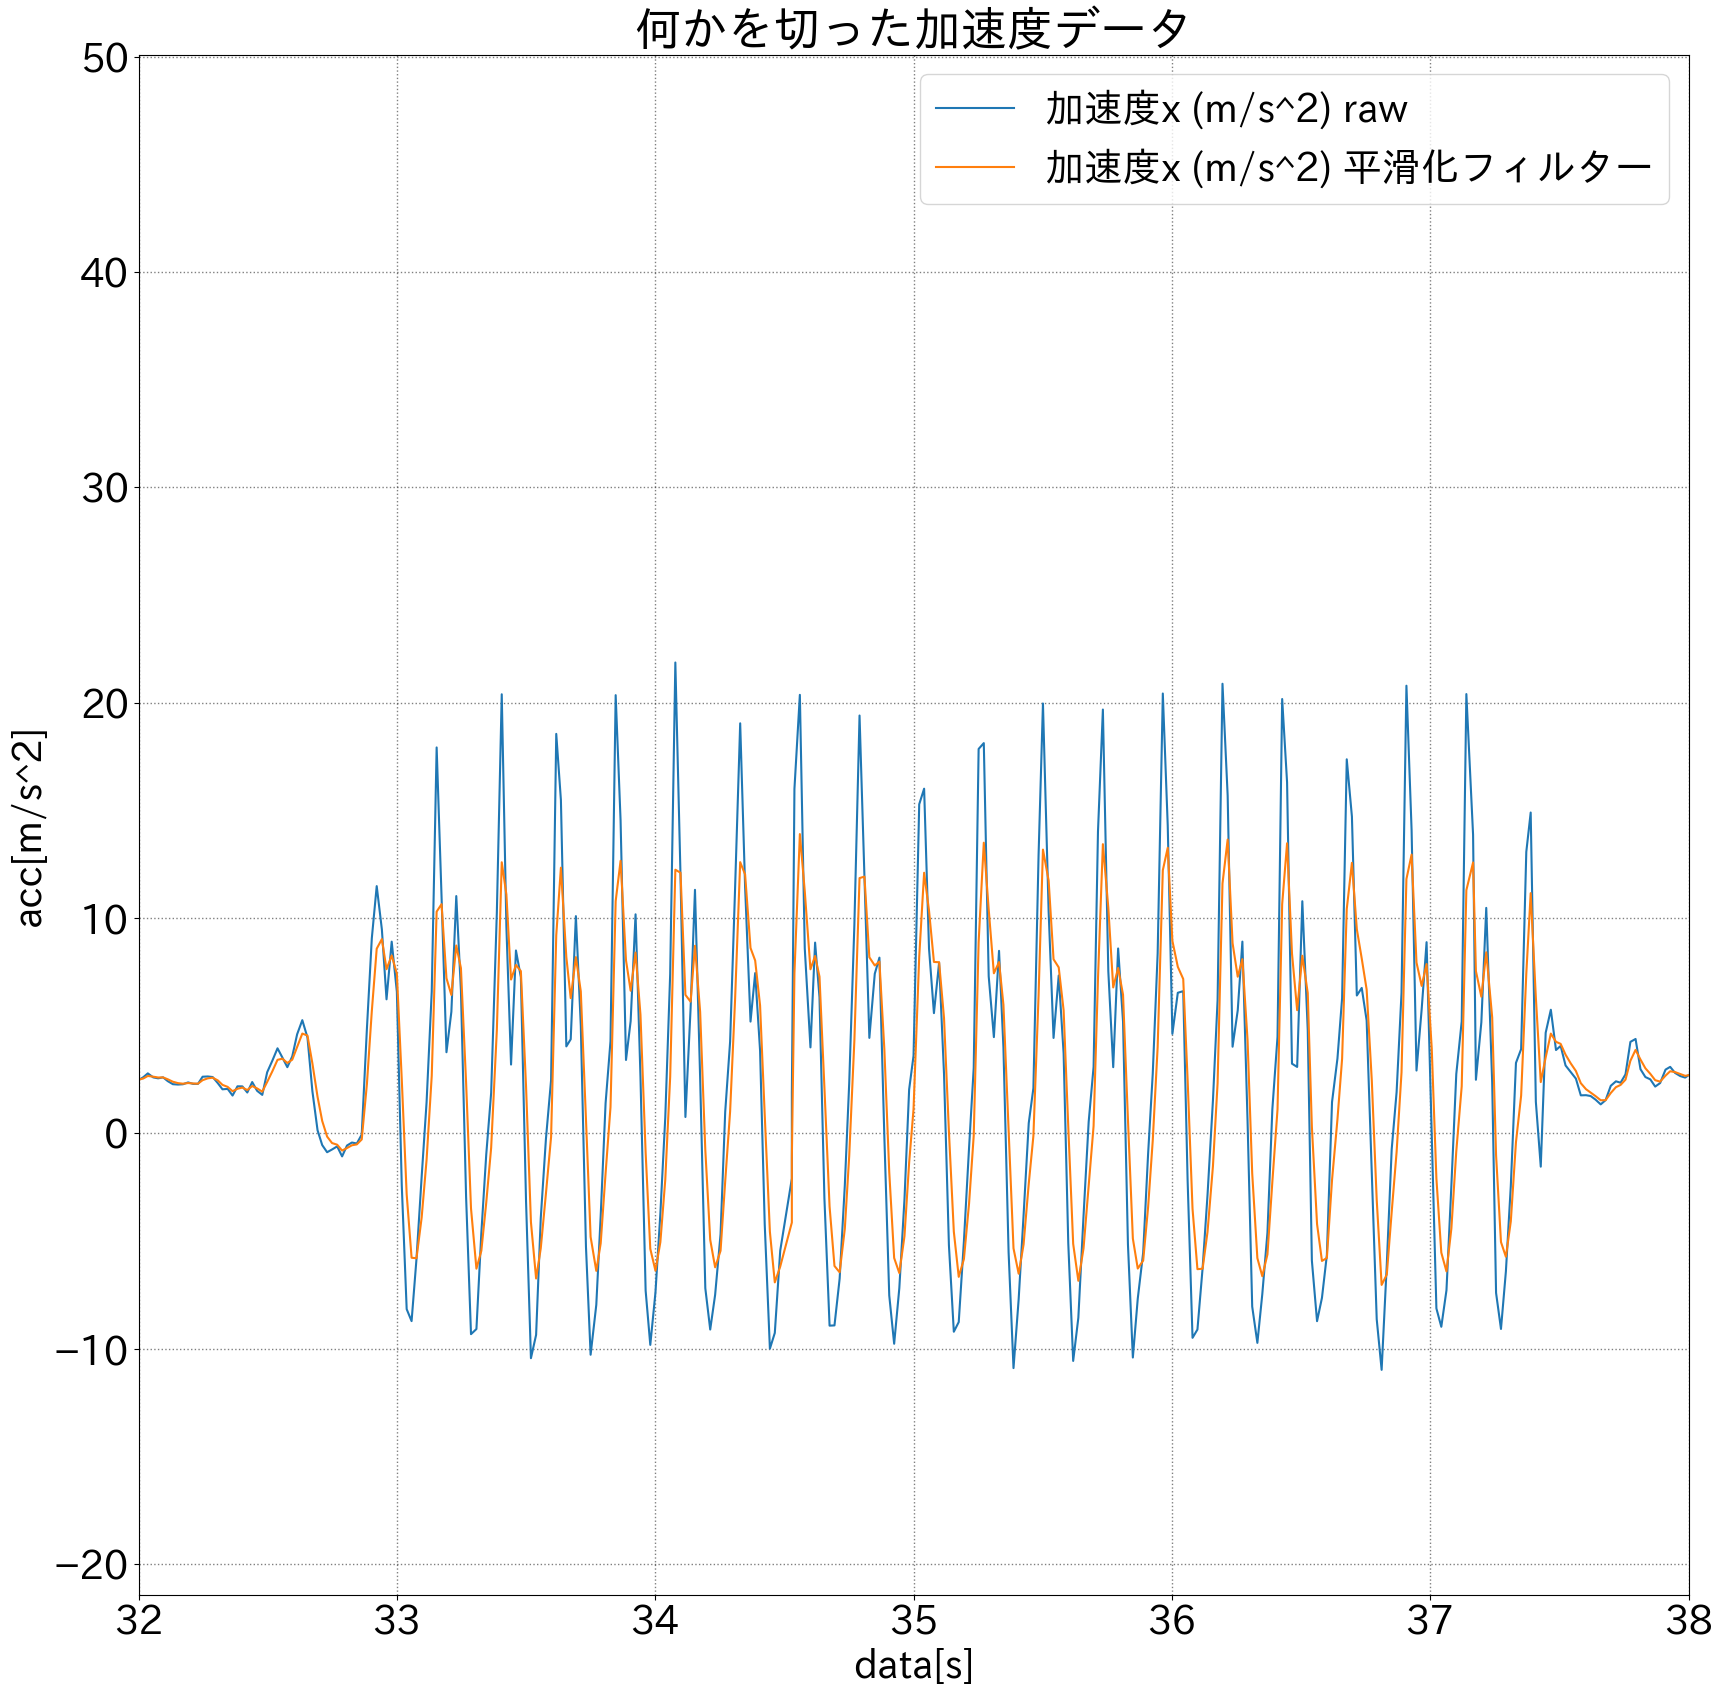

In [35]:
# csvの読み込み
# ヘッダなしの場合csv = pd.read_csv("ファイル名(.csv)", header=None, names=['user_id', 'name'])で可能
acc = pd.read_csv("momR_acc.csv", encoding = 'utf-8')

# データの操作
## グラフの大きさの指定
fig = plt.figure(figsize=(20, 20))
## 一つの画像内に複数のグラフを表示させる場合に使用
ax1 = fig.add_subplot(1, 1, 1)
## グリッドの設定
ax1.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
## グラフのタイトル
ax1.set_title("何かを切った加速度データ")
## x軸のラベル
ax1.set_xlabel('data[s]')
## y軸のラベル
ax1.set_ylabel('acc[m/s^2]')
## y軸の値をオフセットなしで表示
ax1.get_yaxis().get_major_formatter().set_useOffset(False)
## グラフの描画
## ax1.plot(x軸データ,y軸データ,label="ラベル名")
## x軸を最初のデータからの相対時間で表示させています
ax1.plot((acc["time"]-acc["time"][0])/1000, acc["x"], label="加速度x (m/s^2) raw")
# ax1.plot((acc["time"]-acc["time"][0])/1000, acc["y"], label="加速度y (m/s^2) raw")
# ax1.plot((acc["time"]-acc["time"][0])/1000, acc["z"], label="加速度z (m/s^2) raw")


newAcc = []
for index in range(len(acc["x"])):
    if index < 1:
        newAcc.append( acc["x"][0])
    else:
        newAcc.append( acc["x"][index] * 0.5 + newAcc[index-1] * 0.5)




ax1.plot((acc["time"]-acc["time"][0])/1000, newAcc, label="加速度x (m/s^2) 平滑化フィルター")
# ax1.plot((acc["time"]-acc["time"][0])/1000, acc["x"].rolling(window=10).mean(), label="加速度x (m/s^2) rolling10")


ax1.set_xlim(32, 38)




ax1.legend()

